In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [71]:
# function that returns dy/dt
def model(y,t):
    k = 0.5
    dydt = -k*y
    return dydt

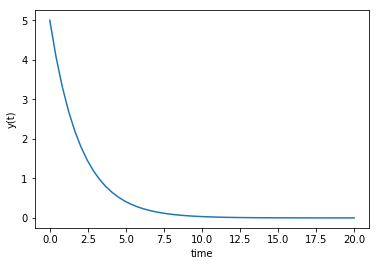

In [72]:
# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

In [97]:
def debug(func):
    '''
    Prints inputs and outputs of decorated function
    '''
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print(f"*args: {[a for a in args]}")
        kwarg_str = ["{k}: {v}" for k, v in kwargs.items()]
        print(f"**kwargs: {[a for a in kwarg_str]}")
        value = func(*args, **kwargs)
        print(f"Returned value: {value}")
        return value
    return wrapper

SyntaxError: invalid syntax (<ipython-input-97-ca0baa7aafbd>, line 7)

In [93]:

def rk4 ( t0, u0, dt, f ):   
    f1 = f(t0, u0)
    f2 = f(t0 + dt / 2.0, u0 + dt * f1 / 2.0 )
    f3 = f(t0 + dt / 2.0, u0 + dt * f2 / 2.0 )
    f4 = f(t0 + dt, u0 + dt * f3 )
#
#  Combine them to estimate the solution U1 at time T1 = T0 + DT.
#
    u1 = u0 + dt * ( f1 + 2.0 * f2 + 2.0 * f3 + f4 ) / 6.0

    return u1

In [94]:
def euler(t0, u0, dt, f):
    x_new = f(u0, dt)
    u0 += x_new*dt
    return u0

In [95]:
traj = []
x0 = 5
dt = 1
# integrate for 10s
for i in range(20):
    dx = rk4(0, x0, dt, model)
    traj.append(dx)
    x0 = dx

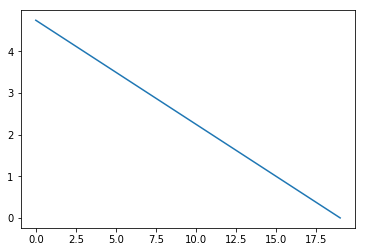

In [96]:
plt.plot(traj)

In [57]:
traj

[4.999985,
 4.999969999999999,
 4.999954999999999,
 4.999939999999999,
 4.999924999999998,
 4.999909999999998,
 4.999894999999998,
 4.999879999999997,
 4.999864999999997,
 4.999849999999997,
 4.9998349999999965,
 4.999819999999996,
 4.999804999999996,
 4.9997899999999955,
 4.999774999999995,
 4.999759999999995,
 4.9997449999999946,
 4.999729999999994,
 4.999714999999994,
 4.999699999999994,
 4.999684999999993,
 4.999669999999993,
 4.999654999999993,
 4.999639999999992,
 4.999624999999992,
 4.999609999999992,
 4.999594999999991,
 4.999579999999991,
 4.999564999999991,
 4.99954999999999,
 4.99953499999999,
 4.99951999999999,
 4.999504999999989,
 4.999489999999989,
 4.999474999999989,
 4.9994599999999885,
 4.999444999999988,
 4.999429999999988,
 4.9994149999999875,
 4.999399999999987,
 4.999384999999987,
 4.9993699999999865,
 4.999354999999986,
 4.999339999999986,
 4.999324999999986,
 4.999309999999985,
 4.999294999999985,
 4.999279999999985,
 4.999264999999984,
 4.999249999999984,
 4.999

## AMazing

$$\frac{1}{2}$$ this is LaTeX

In [ ]:
#!/usr/bin/env python

from numpy import *
from sys import exit
def r8_rkf45 ( f, neqn, y, yp, t, tout, relerr, abserr, flag ):
    """
    y, yp, t, flag  = r8_rkf45 ( f, neqn, y, yp, t, tout, relerr, abserr, flag )
#********************************************
#
## R8_RKF45 carries out the Runge-Kutta-Fehlberg method (double precision).
#
#  Discussion:
#
#    This routine is primarily designed to solve non-stiff and mildly stiff
#    differential equations when derivative evaluations are inexpensive.
#    It should generally not be used when the user is demanding
#    high accuracy.
#
#    This function integrates a system of NEQN first-order ordinary differential
#    equations of the form:
#
#      dY(i)/dT = F(T,Y(1),Y(2), ...  ,Y(NEQN))
#
#    where the Y(1:NEQN) are given at T.
#    Typically the subroutine is used to integrate from T to TOUT but it
#    can be used as a one-step integrator to advance the solution a
#    single step in the direction of TOUT.  On return, the parameters in
#    the call list are set for continuing the integration.  The user has
#    only to call again (and perhaps define a new value for TOUT).
#
#    Before the first call, the user must
#
#    * supply the function  F(T,Y) to evaluate the right hand side YP;
#
#    * initialize the parameters:
#      NEQN, Y(1:NEQN), T, TOUT, RELERR, ABSERR, FLAG.
#      In particular, T should initially be the starting point for integration,
#      Y should be the value of the initial conditions, and FLAG should
#      normally be +1.
#
#    Normally, the user only sets the value of FLAG before the first call, and
#    thereafter, the program manages the value.  On the first call, FLAG should
#    normally be +1 (or -1 for single step mode.)  On normal return, FLAG will
#    have been reset by the program to the value of 2 (or -2 in single
#    step mode), and the user can continue to call the routine with that
#    value of FLAG.
#
#    (When the input magnitude of FLAG is 1, this indicates to the program
#    that it is necessary to do some initialization work.  An input magnitude
#    of 2 lets the program know that that initialization can be skipped,
#    and that useful information was computed earlier.)
#
#    The function returns with all the information needed to continue
#    the integration.  If the integration reached TOUT, the user need only
#    define a new TOUT and call again.  In the one-step integrator
#    mode, returning with FLAG = -2, the user must keep in mind that
#    each step taken is in the direction of the current TOUT.  Upon
#    reaching TOUT, indicated by the output value of FLAG switching to 2,
#    the user must define a new TOUT and reset FLAG to -2 to continue
#    in the one-step integrator mode.
#
#    In some cases, an error or difficulty occurs during a call.  In that case,
#    the output value of FLAG is used to indicate that there is a problem
#    that the user must address.  These values include:
#
#    * 3, integration was not completed because the input value of RELERR, the
#      relative error tolerance, was too small.  RELERR has been increased
#      appropriately for continuing.  If the user accepts the output value of
#      RELERR, then simply reset FLAG to 2 and continue.
#
#    * 4, integration was not completed because more than MAXNFE derivative
#      evaluations were needed.  This is approximately (MAXNFE/6) steps.
#      The user may continue by simply calling again.  The function counter
#      will be reset to 0, and another MAXNFE function evaluations are allowed.
#
#    * 5, integration was not completed because the solution vanished,
#      making a pure relative error test impossible.  The user must use
#      a non-zero ABSERR to continue.  Using the one-step integration mode
#      for one step is a good way to proceed.
#
#    * 6, integration was not completed because the requested accuracy
#      could not be achieved, even using the smallest allowable stepsize.
#      The user must increase the error tolerances ABSERR or RELERR before
#      continuing.  It is also necessary to reset FLAG to 2 (or -2 when
#      the one-step integration mode is being used).  The occurrence of
#      FLAG = 6 indicates a trouble spot.  The solution is changing
#      rapidly, or a singularity may be present.  It often is inadvisable
#      to continue.
#
#    * 7, it is likely that this routine is inefficient for solving
#      this problem.  Too much output is restricting the natural stepsize
#      choice.  The user should use the one-step integration mode with
#      the stepsize determined by the code.  If the user insists upon
#      continuing the integration, reset FLAG to 2 before calling
#      again.  Otherwise, execution will be terminated.
#
#    * 8, invalid input parameters, indicates one of the following:
#      NEQN <= 0;
#      T = TOUT and |FLAG| /= 1;
#      RELERR < 0 or ABSERR < 0;
#      FLAG == 0  or FLAG < -2 or 8 < FLAG.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.
#
#  Modified:
#
#    05 April 2011
#
#  Author:
#
#    Original FORTRAN77 version by Herman Watts, Lawrence Shampine.
#    MATLAB version by John Burkardt and then to Python by Peter Monk
#
#  Reference:
#
#    Erwin Fehlberg,
#    Low-order Classical Runge-Kutta Formulas with Stepsize Control,
#    NASA Technical Report R-315, 1969.
#
#    Lawrence Shampine, Herman Watts, S Davenport,
#    Solving Non-stiff Ordinary Differential Equations - The State of the Art,
#    SIAM Review,
#    Volume 18, pages 376-411, 1976.
#
#  Parameters:
#
#    Input, function F, a user-supplied function to evaluate the
#    derivatives dYdT(T), of the form:
#     def f ( t, y ):
#         <statements>
#         return(yp)
#
#    Input, integer NEQN, the number of equations to be integrated.
#
#    Input/output, real Y(NEQN), the current solution vector at T.
#
#    Input/output, real YP(NEQN), the current value of the
#    derivative of the dependent variable.  The user should not set or alter
#    this information%
#
#    Input/output, real T, the current value of the independent
#    variable.
#
#    Input, real TOUT, the output point at which solution is
#    desired.  TOUT = T is allowed on the first call only, in which case
#    the routine returns with FLAG = 2 if continuation is possible.
#
#    Input, real RELERR, ABSERR, the relative and absolute
#    error tolerances for the local error test.  At each step the code
#    requires:
#      abs ( local error ) <= RELERR * abs ( Y ) + ABSERR
#    for each component of the local error and the solution vector Y.
#    RELERR cannot be "too small".  If the routine believes RELERR has been
#    set too small, it will reset RELERR to an acceptable value and return
#    immediately for user action.
#
#    Input/output, integer FLAG, indicator for status of integration.
#    On the first call, set FLAG to +1 for normal use, or to -1 for single
#    step mode.  On return, a value of 2 or -2 indicates normal progress,
#    while any other value indicates a problem that should be addressed.
#
    """
    global abserr_save, flag_save, h, init, kflag, kop, nfe, relerr_save
    try:
        abserr_save
    except NameError:
        abserr_save = -1.0
        h = -1.0
        flag_save = -1000
        init = -1000
        kflag = -1000
        kop = -1
        nfe = -1
        relerr_save = -1.0

    maxnfe = 3000000
    remin = 1.0E-12
#
#  Check the input parameters.
#
    if ( neqn < 1 ):
        flag = 8
        print ( 'neqn=' % ( neqn ) )
        return(y, yp, t, flag)

    if ( relerr < 0.0 ):
        flag = 8
        print ( 'relerr=' % ( relerr ) )
        return ( y, yp, t, flag )

    if ( abserr < 0.0 ):
        flag = 8
        print ( 'abserr=' % ( abserr ) )
        return(y, yp, t, flag)

    if ( flag == 0) or (8 < flag) or ( flag < -2 ):
        flag = 8
        print ( 'flag=', flag )
        return(y, yp, t, flag)
    
    mflag = abs ( flag )
#
#  Is this a continuation call?
#
    if ( mflag != 1 ):
        if ( t == tout) and ( kflag != 3 ):
            flag = 8
            print ( 't=',t,'tout=',tout,'kflag=',kflag )
            return(y, yp, t, flag)
        if ( mflag == 2 ):
            if ( kflag == 3 ):
                flag = flag_save
                mflag = abs ( flag )
            elif ( init == 0 ):
                flag = flag_save
            elif ( kflag == 4 ):
                nfe = 0
            elif ( kflag == 5) and (abserr == 0.0 ):
                print ( '' )
                print ( 'R8_RKF45 - Fatal error!' )
                print ( '  KFLAG = 5 and ABSERR = 0.' )
                error ( 'R8_RKF45 - Fatal error!')
            elif ( kflag == 6) and (relerr <= relerr_save) and (abserr <= abserr_save ):          
                print ( '' )
                print ( 'R8_RKF45 - Fatal error!' )
                print ( '  KFLAG = 6 and' )
                print ( '  RELERR <= RELERR_SAVE and' )
                print ( '  ABSERR <= ABSERR_SAVE' )
                error ( 'R8_RKF45 - Fatal error!')
        #
        #  FLAG = 3, 4, 5, 6, 7 or 8.
        #
        else:
            if ( flag == 3 ):
                flag = flag_save
                if ( kflag == 3 ):
                    mflag = abs ( flag )
            elif ( flag == 4 ):
                nfe = 0
                flag = flag_save
                if ( kflag == 3 ):
                    mflag = abs ( flag )
            elif ( flag == 5) and ( 0.0 < abserr ):
                flag = flag_save
                if ( kflag == 3 ):
                    mflag = abs ( flag )
            #
            #  Integration cannot be continued because the user did not respond to
            #  the instructions pertaining to FLAG = 5, 6, 7 or 8.
            #
            else:
                print ( '' )
                print ( 'R8_RKF45 - Fatal error!' )
                print ( '  Integration cannot continue because the user' )
                print ( '  did not respond to the instructions pertaining' )
                print ( '  to the output flag warning FLAG = 5, 6, 7 or 8.' )
                error ( 'R8_RKF45 - Fatal error!') 
#
#  Save the input value of FLAG.
#  Set the continuation flag KFLAG for subsequent input checking.
#
    flag_save = flag
    kflag = 0
#
#  Save RELERR and ABSERR for checking input on subsequent calls.
#
    relerr_save = relerr
    abserr_save = abserr
#
#  Restrict the relative error tolerance to be at least
#
#    2 * EPS + REMIN
#
#  to avoid limiting precision difficulties arising from impossible
#  accuracy requests.
#
    relerr_min = 2.0 * finfo(double).eps + remin
#
#  Is the relative error tolerance too small?
#
    if ( relerr < relerr_min ):
        relerr = relerr_min
        flag = 3
        kflag = 3
        return(y, yp, t, flag)
    dt = tout - t
#
#  Initialization:
#
#  Set the initialization completion indicator, INIT;
#  set the indicator for too many output points, KOP;
#  evaluate the initial derivatives;
#  set the counter for function evaluations, NFE;
#  estimate the starting stepsize.
#
    if ( mflag == 1 ):
        init = 0
        kop = 0
        yp = f ( t, y )
        nfe = 1
        if ( t == tout ):
            flag = 2
            return(y, yp, t, flag)
    if ( init == 0 ):
        init = 1
        h = abs ( dt )
        toln = 0.0;
        for k in range(0,neqn):
            tol = relerr * abs ( y[k] ) + abserr
            if ( 0.0 < tol ):
                toln = tol
                ypk = abs ( yp[k] )
                if ( tol < ypk * h**5 ):
                    h = ( tol / ypk )**0.2
        if ( toln <= 0.0 ):
            h = 0.0
        h = max ( h, 26.0 * finfo(double).eps * max ( abs ( t ), abs ( dt ) ) );
        if ( flag < 0 ):
            flag_save = - 2
        else:
            flag_save = + 2
#
#  Set the stepsize for integration in the direction from T to TOUT.
#
    if ( dt < 0.0 ):
        h = - abs ( h )
    else:
        h = + abs ( h )
#
#  Test to see if too may output points are being requested.
#
    if ( 2.0 * abs ( dt ) <= abs ( h ) ):
        kop = kop + 1
    #
    #  Unnecessary frequency of output.
    #
    if ( kop == 2000 ):
        kop = 0
        print ( 'Unnecessary frequency of output.' )
        flag = 7
        return(y, yp, t, flag)
#
#  If we are too close to the output point, then simply extrapolate and return.
#
    if ( abs ( dt ) <= 26.0 * finfo(double).eps * abs ( t ) ):
        t = tout
        y = y + dt * yp
        yp = f ( t, y )
        nfe = nfe + 1
        flag = 2
        print ( 'too close' )
        return(y, yp, t, flag)
#
#  Initialize the output point indicator.
#
    output = 0
#
#  To avoid premature underflow in the error tolerance function,
#  scale the error tolerances.
#
    scale = 2.0 / relerr
    ae = scale * abserr
#
#  Step by step integration.
#
    while ( 1 ):
        hfaild = 0
    #
    #  Set the smallest allowable stepsize.
    #
        hmin = 26.0 * finfo(double).eps * abs ( t )
    #
    #  Adjust the stepsize if necessary to hit the output point.
    #
    #  Look ahead two steps to avoid drastic changes in the stepsize and
    #  thus lessen the impact of output points on the code.
    #
        dt = tout - t
        if ( 2.0 * abs ( h ) > abs ( dt ) ):
        #
        #  Will the next successful step complete the integration to the output point?
        #
            if ( abs ( dt ) <= abs ( h ) ):
                output = 1
                h = dt
            else:
                h = 0.5 * dt
    #
    #  Here begins the core integrator for taking a single step.
    #
    #  The tolerances have been scaled to avoid premature underflow in
    #  computing the error tolerance function ET.
    #  To avoid problems with zero crossings, relative error is measured
    #  using the average of the magnitudes of the solution at the
    #  beginning and end of a step.
    #  The error estimate formula has been grouped to control loss of
    #  significance.
    #
    #  To distinguish the various arguments, H is not permitted
    #  to become smaller than 26 units of roundoff in T.
    #  Practical limits on the change in the stepsize are enforced to
    #  smooth the stepsize selection process and to avoid excessive
    #  chattering on problems having discontinuities.
    #  To prevent unnecessary failures, the code uses 9/10 the stepsize
    #  it estimates will succeed.
    #
    #  After a step failure, the stepsize is not allowed to increase for
    #  the next attempted step.  This makes the code more efficient on
    #  problems having discontinuities and more effective in general
    #  since local extrapolation is being used and extra caution seems
    #  warranted.
    #
    #  Test the number of derivative function evaluations.
    #  If okay, try to advance the integration from T to T+H.
    #
        while ( True ):
        #
        #  Have we done too much work?
        #
            if ( maxnfe < nfe ):
                flag = 4
                kflag = 4
                return(y, yp, t, flag)
        #
        #  Advance an approximate solution over one step of length H.
        #
            f1, f2, f3, f4, f5, f6  = r8_fehl( f, neqn, y, t, h, yp )
            f1 = f6.copy()
            nfe = nfe + 5
        #
        #  Compute and test allowable tolerances versus local error estimates
        #  and remove scaling of tolerances.  The relative error is
        #  measured with respect to the average of the magnitudes of the
        #  solution at the beginning and end of the step.
        #
            eeoet = 0.0
            for k in range(0,neqn):
                et = abs ( y[k] ) + abs ( f1[k] ) + ae
                if ( et <= 0.0 ):
                    flag = 5
                    return(y, yp, t, flag)
                ee = abs( ( -2090.0 * yp[k] + ( 21970.0 * f3[k] - 15048.0 * f4[k] )) \
                          + ( 22528.0 * f2[k] - 27360.0 * f5[k] ) )
                eeoet = max ( eeoet, ee / et )
            esttol = abs ( h ) * eeoet * scale / 752400.0
            if ( esttol <= 1.0 ):
                break
        #
        #  Unsuccessful step.  Reduce the stepsize, try again.
        #  The decrease is limited to a factor of 1/10.
        #
            hfaild = 1
            output = 0
            if ( esttol < 59049.0 ):
                s = 0.9 / esttol**0.2
            else:
                s = 0.1
            h = s * h
            if ( abs ( h ) < hmin ):
                flag = 6
                kflag = 6
                return(y, yp, t, flag)
    #
    #  We exited the loop because we took a successful step.
    #  Store the solution for T+H, and evaluate the derivative there.
    #
        t = t + h
        y = f1.copy()
        yp = f ( t, y )
        nfe = nfe + 1
    #
    #  Choose the next stepsize.  The increase is limited to a factor of 5.
    #  If the step failed, the next stepsize is not allowed to increase.
    #
        if ( 0.0001889568 < esttol ):
            s = 0.9 / esttol**0.2
        else:
            s = 5.0
        if ( hfaild ):
            s = min ( s, 1.0 )
        if ( h < 0.0 ):
            h = - max ( s * abs ( h ), hmin )
        else:
            h = + max ( s * abs ( h ), hmin )
    #
    #  End of core integrator
    #
    #  Should we take another step?
    #
        if ( output ):
            t = tout
            flag = 2
            return(y, yp, t, flag)
        if ( flag <= 0 ):
            break
#
#  One step integration mode.
#
    flag = - 2
    return(y, yp, t, flag)

def r8_fehl ( f, neqn, y, t, h, yp ):
    """
#*****************************************************************************80
#
## R8_FEHL takes one Fehlberg fourth-fifth order step.
#
#  Discussion:
#
#    This routine integrates a system of NEQN first order ordinary differential
#    equations of the form
#      dY(i)/dT = F(T,Y(1:NEQN))
#    where the initial values Y and the initial derivatives
#    YP are specified at the starting point T.
#
#    The routine advances the solution over the fixed step H and returns
#    the fifth order (sixth order accurate locally) solution
#    approximation at T+H in array S.
#
#    The formulas have been grouped to control loss of significance.
#    The routine should be called with an H not smaller than 13 units of
#    roundoff in T so that the various independent arguments can be
#    distinguished.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.
#
#  Modified:
#
#    30 August 2010
#
#  Author:
#
#    Original FORTRAN77 version by Herman Watts, Lawrence Shampine.
#    MATLAB version by John Burkardt.
#
#  Reference:
#
#    Erwin Fehlberg,
#    Low-order Classical Runge-Kutta Formulas with Stepsize Control,
#    NASA Technical Report R-315, 1969.
#
#    Lawrence Shampine, Herman Watts, S Davenport,
#    Solving Non-stiff Ordinary Differential Equations - The State of the Art,
#    SIAM Review,
#    Volume 18, pages 376-411, 1976.
#
#  Parameters:
#
#    Input, function F, a user-supplied function to evaluate the
#    derivatives dYdT, of the form:
#
#      function yp = f ( t, y )
#
#    Input, integer NEQN, the number of equations to be integrated.
#
#    Input, real Y(NEQN), the current value of the
#    dependent variable.
#
#    Input, real T, the current value of the independent
#    variable.
#
#    Input, real H, the step size to take.
#
#    Input, real YP(NEQN), the current value of the
#    derivative of the dependent variable.
#
#    Output, real F1(NEQN), F2(NEQN), F3(NEQN), F4(NEQN),
#    F5(NEQN), derivative values needed for the computation.
#
#    Output, real S(NEQN), the estimate of the solution at T+H.
#
    """
    ch = h / 4.0
    f5 = y + ch * yp
    f1 = f ( t + ch, f5 )
    ch = 3.0 * h / 32.0
    f5 = y + ch * ( yp + 3.0 * f1 )
    f2 = f ( t + 3.0 * h / 8.0, f5 )
    ch = h / 2197.0
    f5 = y + ch * ( 1932.0 * yp + ( 7296.0 * f2 - 7200.0 * f1 ) )
    f3 = f ( t + 12.0 * h / 13.0, f5 )
    ch = h / 4104.0
    f5 = y + ch * (( 8341.0 * yp - 845.0 * f3) + ( 29440.0 * f2 - 32832.0 * f1 ) )
    f4 = f ( t + h, f5 )
    ch = h / 20520.0
    f1 = y + ch * ( ( -6080.0 * yp + ( 9295.0 * f3 - 5643.0 * f4 ) ) + \
                    ( 41040.0 * f1 - 28352.0 * f2 ) )
    f5 = f ( t + h / 2.0, f1 )
#
#  Ready to compute the approximate solution at T+H.
#
    ch = h / 7618050.0
    s = y + ch * ( ( 902880.0 * yp + ( 3855735.0 * f3 - 1371249.0 * f4 ) ) \
        + ( 3953664.0 * f2 + 277020.0 * f5 ) )
    return(f1, f2, f3, f4, f5, s)

def error(string):
    """
    Simple error handling
    """
    print ( string )
    exit('Fatal error')
